# NNLab1
  1. Forward Propagation
  2. Backword Propagation
  3. Weight Update
  4. Calculate the back propagation error value and weight update for 333 NN with  
  targets = numpy.matrix([0.01], [0.01], [0.99])

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. 333 NN(neural network) Forward Propagation
각각 3개의 노드를 가지는 3개의 계층으로 구성된 신경망(그림이 복잡해지는 것을 막기 위해 일부의 가중치만 표시하였음)  
  
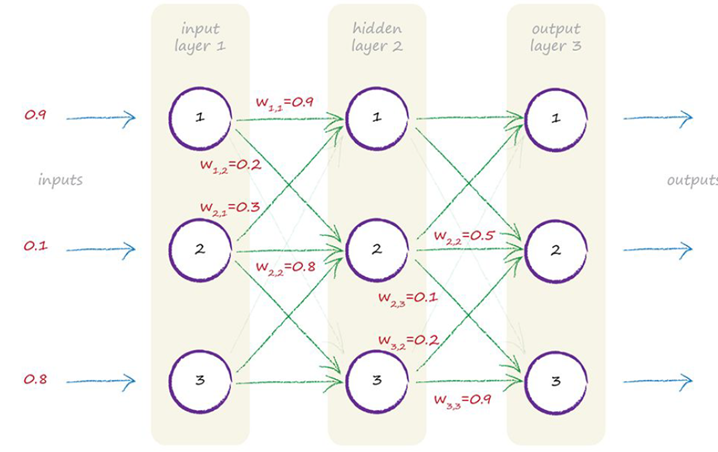

입력 값은 3개가 존재하며 각각 0.9, 0.1, 0.8입니다. 그러므로 행렬 I는 다음과 같이 표현할 수 있습니다.  
  
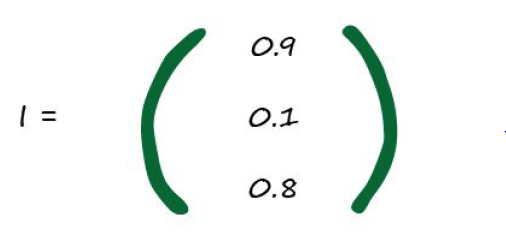  
### 가중치는 다음과 같이 초기화해줍니다.  
W_input_hidden은 입력 계층과 은닉 계층 간의 가중치 행렬입니다.  
W_hidden_output은 은닉 계층과 출력 계층 간의 가중치 행렬입니다.  
  
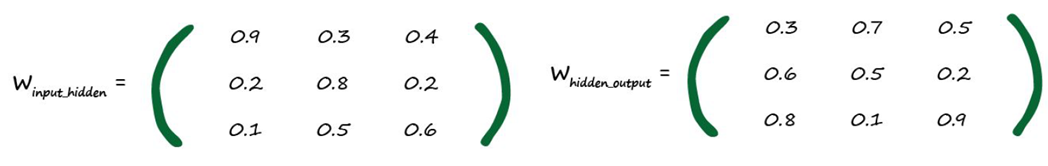

In [2]:
import numpy as np
# import math # np에도 ext 있음

In [3]:
# I = np.array([[0.9],
#               [0.1],
#               [0.8]])
I = np.array([0.9, 0.1, 0.8], ndmin=2).T
W_i_h = np.array([[0.9, 0.3, 0.4],
                  [0.2, 0.8, 0.2],
                  [0.1, 0.5, 0.6]])
W_h_o = np.array([[0.3, 0.7, 0.5],
                  [0.6, 0.5, 0.2],
                  [0.8, 0.1, 0.9]])

I
W_i_h
W_h_o

array([[0.9],
       [0.1],
       [0.8]])

array([[0.9, 0.3, 0.4],
       [0.2, 0.8, 0.2],
       [0.1, 0.5, 0.6]])

array([[0.3, 0.7, 0.5],
       [0.6, 0.5, 0.2],
       [0.8, 0.1, 0.9]])

X_hidden은 은닉 계층의 조정된 합입니다.  
X_hidden = W_input_hidden * I  
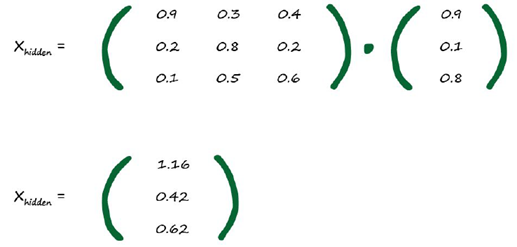
  
위 행렬의 계산 결과를 그림으로 나타내면 다음과 같습니다.
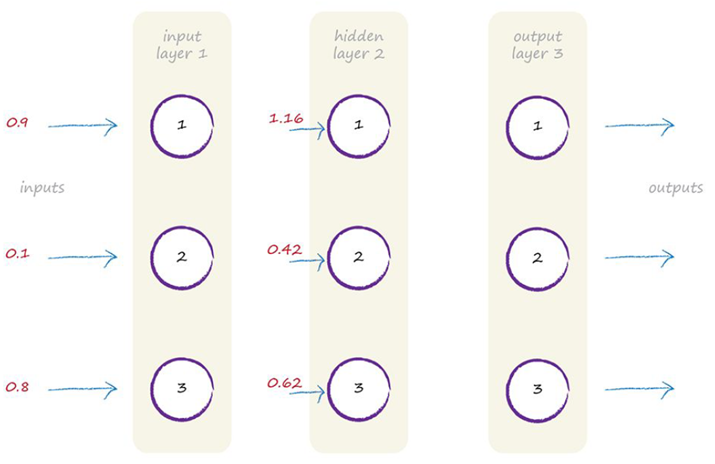

신호를 자연스럽게 전달하기 위해 은닉 계층의 노드에 각각 시그모이드 활성화 함수를 적용합니다.  
O_hidden은 X_hidden에 시그모이드 활성화 함수를 적용한 결과입니다.
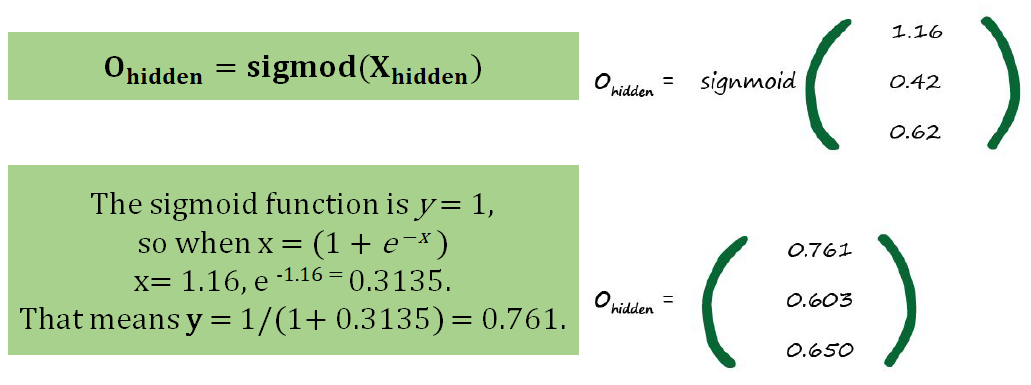  
그림으로 나타내면 다음과 같습니다.  
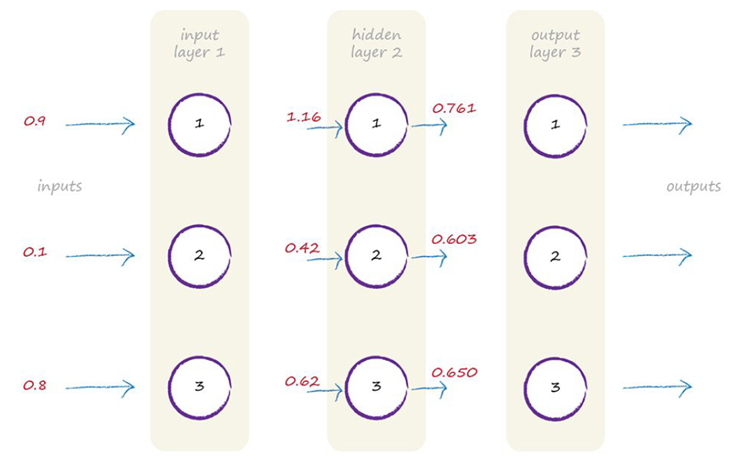

In [4]:
# def sigmoid(x):
#     return 1 / (1 + math.exp(-x))
sigmoid = lambda x: 1 / (1 + np.exp(-x))

In [5]:
X_h = np.dot(W_i_h, I)
# O_h = np.array([[sigmoid(X_h[0])],
#                [sigmoid(X_h[1])],
#                [sigmoid(X_h[2])]])
O_h = sigmoid(X_h)

X_h
O_h

array([[1.16],
       [0.42],
       [0.62]])

array([[0.76133271],
       [0.60348325],
       [0.65021855]])

### 같은 방식으로 X_output과 O_output도 구합니다.  
cf) X_output = W_hidden_output * O_hidden  
  
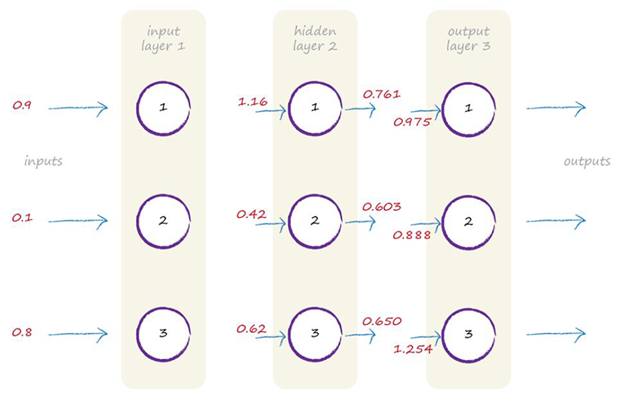
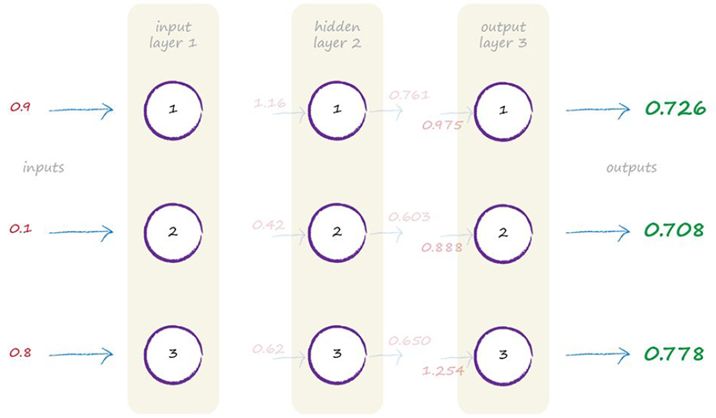

In [6]:
X_o = np.dot(W_h_o, O_h)
O_o = sigmoid(X_o)


X_o
O_o

array([[0.97594736],
       [0.88858496],
       [1.25461119]])

array([[0.72630335],
       [0.70859807],
       [0.77809706]])

## 2. 222 NN Backward Propagation
다음은 3개 계층으로 구성된 신경망입니다.  
  
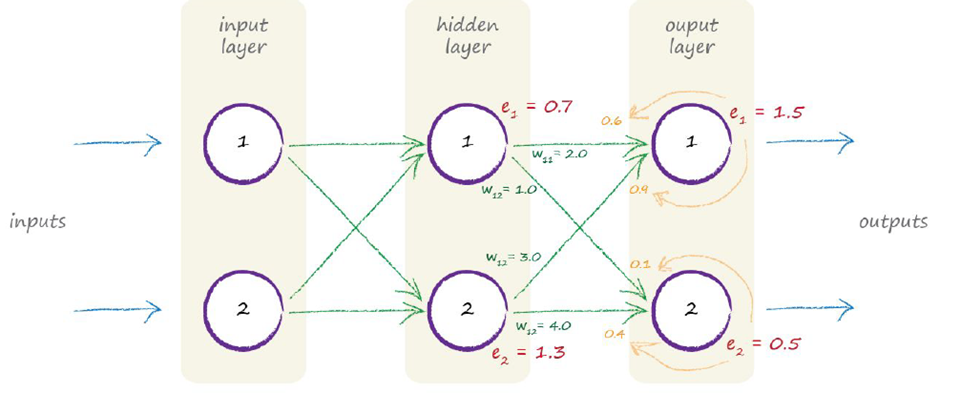  
  
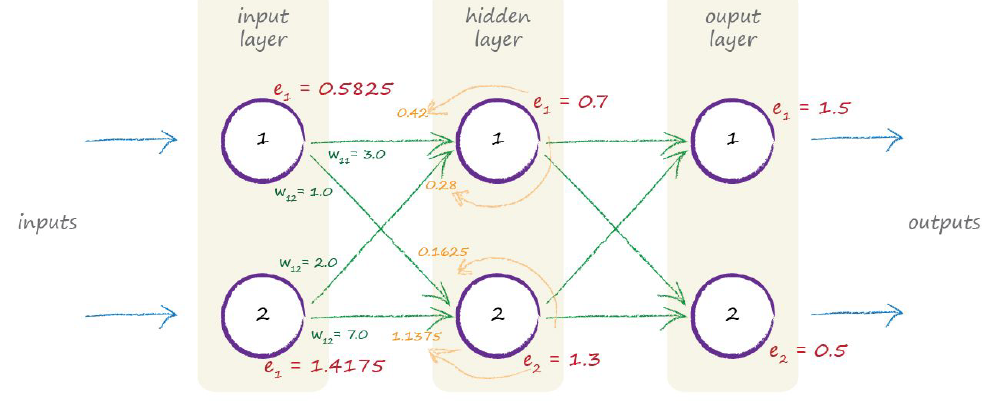
  
### 우선은 가중치 행렬부터 만들겠습니다.

In [7]:
W_i_h = np.array([[3.0, 2.0],
                 [1.0, 7.0]])
W_h_o = np.array([[2.0, 3.0],
                [1.0, 4.0]])

W_i_h
W_h_o

array([[3., 2.],
       [1., 7.]])

array([[2., 3.],
       [1., 4.]])

오차의 역전파는 다음과 같은 식을 통해 이루어집니다.  
  
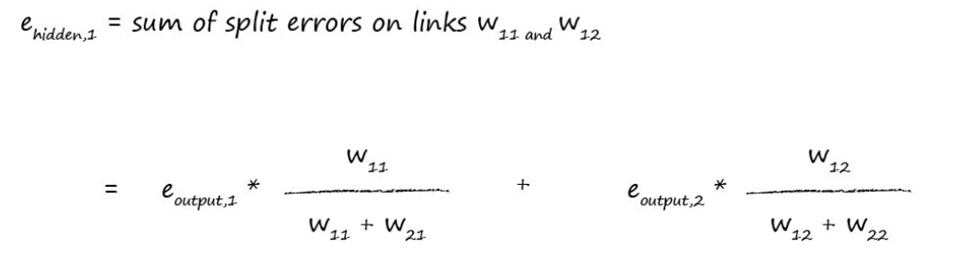

우리는 Forward Propagation에서 했던 것처럼 행렬곱을 이용해서 문제를 해결합니다.  
  
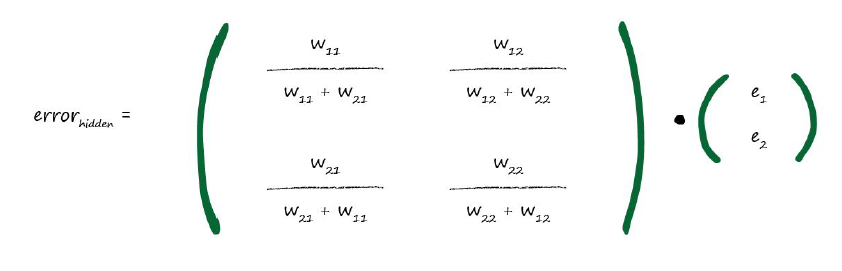  
  
하지만 식이 너무 복잡한 것 같습니다. 간결하게 쓰고 싶으니 좀 대담해집시다.  
분수에서 분모 부분을 제거하겠습니다.  
  
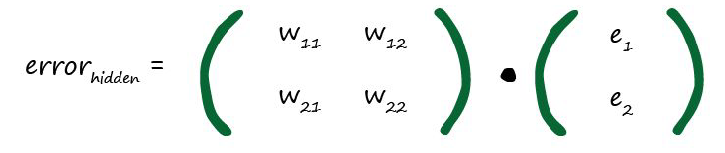

### 이제 이렇게 하면 될 것 같습니다.
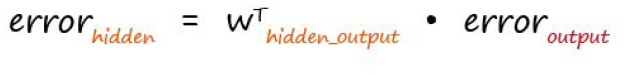

In [8]:
e_o = np.array([[0.8],
               [0.5]])
# e_h = np.dot(np.transpose(W_h_o), e_o)
e_h = np.dot(W_h_o.T, e_o)

e_o
e_h

array([[0.8],
       [0.5]])

array([[2.1],
       [4.4]])

### error_input도 마찬가지의 방법으로 구합니다.

In [9]:
e_i = np.dot(W_i_h.T, e_h)

e_i

array([[10.7],
       [35. ]])

## 3. 222 NN Weight Update
오차함수의 기울기를 통해 가중치를 업데이트 합니다.  
기울기를 구하는 과정은 다음과 같습니다.

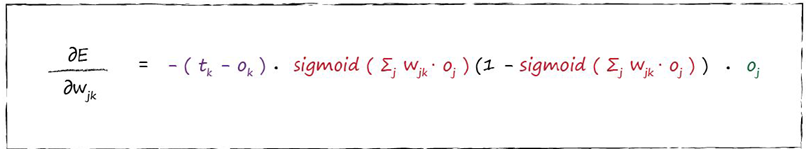

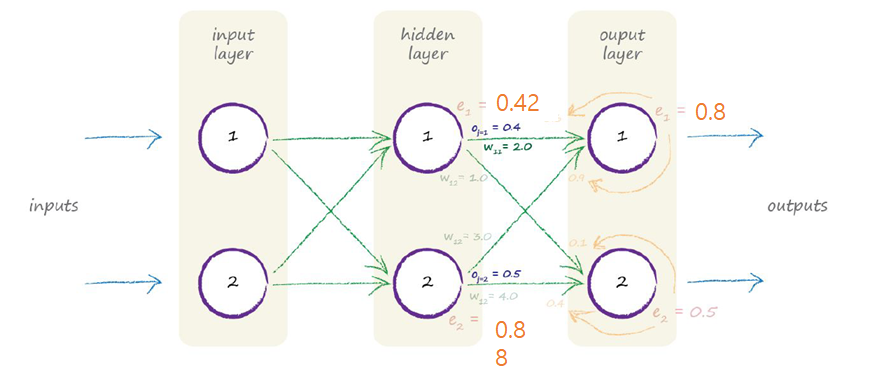
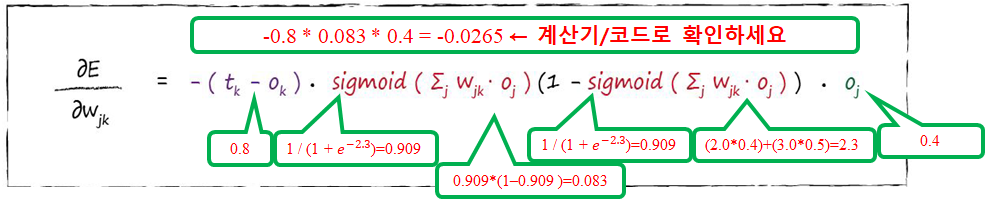

In [10]:
s_h_o_1 = sigmoid(2.0 * 0.4 + 3.0 * 0.5)
dEdw_h_o_1 = -0.8 * s_h_o_1 * (1 - s_h_o_1) * 0.4

dEdw_h_o_1

-0.02650226143703718

### 이제 알파 값(learning rate)를 정하고 다음과 같은 식을 적용하면 됩니다.
알파 값은 0.1로 합니다.
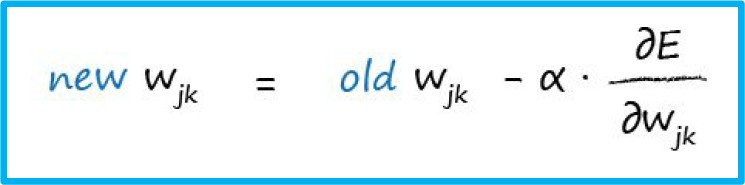

In [11]:
lr = 0.1
new_w_h_o_1 = 2.0 - 0.1 * dEdw_h_o_1

new_w_h_o_1

2.002650226143704

## 4. 333 NN Backward Propagation & Weight Update
targets = numpy.array([[0.01], [0.01], [0.99]]) 

1에서 썼던 입력 값과 가중치를 재사용합니다.
  
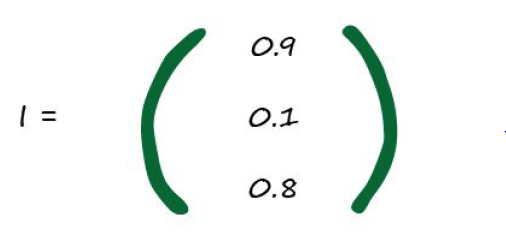  
  
가중치는 다음과 같습니다.  
  
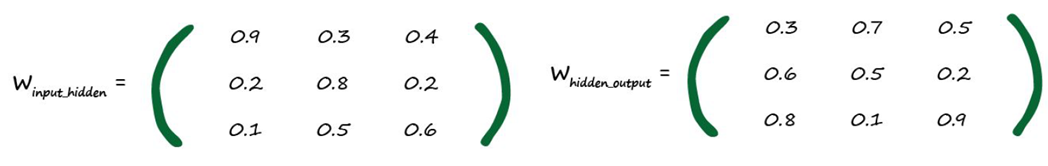

In [12]:
I = np.array([[0.9],
              [0.1],
              [0.8]])
W_i_h = np.array([[0.9, 0.3, 0.4],
                  [0.2, 0.8, 0.2],
                  [0.1, 0.5, 0.6]])
W_h_o = np.array([[0.3, 0.7, 0.5],
                  [0.6, 0.5, 0.2],
                  [0.8, 0.1, 0.9]])

I
W_i_h
W_h_o

array([[0.9],
       [0.1],
       [0.8]])

array([[0.9, 0.3, 0.4],
       [0.2, 0.8, 0.2],
       [0.1, 0.5, 0.6]])

array([[0.3, 0.7, 0.5],
       [0.6, 0.5, 0.2],
       [0.8, 0.1, 0.9]])

### target은 각각 0.01, 0.01, 0.99

In [13]:
target = np.array([[0.01],
                  [0.01],
                  [0.99]])
target

O_o

array([[0.01],
       [0.01],
       [0.99]])

array([[0.72630335],
       [0.70859807],
       [0.77809706]])

In [14]:
e_o = target - O_o
e_o

array([[-0.71630335],
       [-0.69859807],
       [ 0.21190294]])

## Backward Propagation

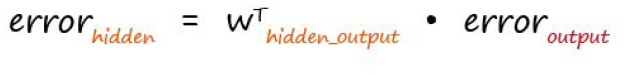

In [15]:
e_h = np.dot(np.transpose(W_h_o), e_o)
e_h

array([[-0.46452749],
       [-0.82952108],
       [-0.30715864]])

In [16]:
e_i = np.dot(np.transpose(W_i_h), e_h)
e_i

array([[-0.61469483],
       [-0.95655444],
       [-0.5360104 ]])

## Weight Update

### Output까지 Forward Propagation하면 다음과 같다.
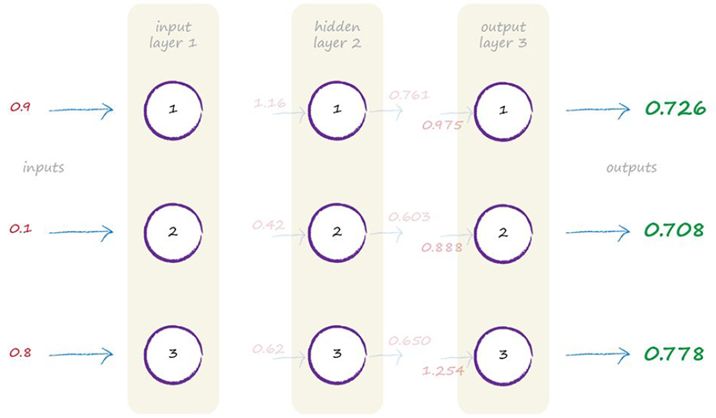

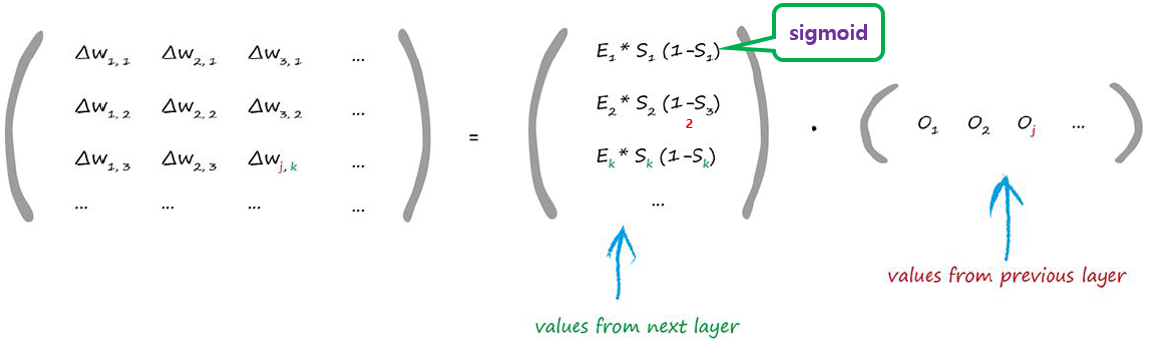

In [17]:
A = np.array([[1],
            [10]])
B = np.array([[3],
            [7]])
A * B

1 - A

array([[ 3],
       [70]])

array([[ 0],
       [-9]])

In [18]:
# sigmoid = lambda x: 1 / (1 + np.exp(-x))
e_o
O_o
O_h

dEdW_h_o = np.dot(e_o * sigmoid(O_o) * (1 - sigmoid(O_o)), np.transpose(O_h))
dEdW_h_o

array([[-0.71630335],
       [-0.69859807],
       [ 0.21190294]])

array([[0.72630335],
       [0.70859807],
       [0.77809706]])

array([[0.76133271],
       [0.60348325],
       [0.65021855]])

array([[-0.11982665, -0.09498262, -0.10233832],
       [-0.11757896, -0.09320095, -0.10041867],
       [ 0.03479457,  0.0275805 ,  0.02971641]])

In [19]:
W_h_o = W_h_o - lr * dEdW_h_o
W_h_o

array([[0.31198266, 0.70949826, 0.51023383],
       [0.6117579 , 0.5093201 , 0.21004187],
       [0.79652054, 0.09724195, 0.89702836]])

#### W_i_h도 같은 방식으로 진행합니다.

In [20]:
e_h
O_h
I # O_i

dEdW_i_h = np.dot(e_h * sigmoid(O_h) * (1 - sigmoid(O_h)), np.transpose(I))
dEdW_i_h

array([[-0.46452749],
       [-0.82952108],
       [-0.30715864]])

array([[0.76133271],
       [0.60348325],
       [0.65021855]])

array([[0.9],
       [0.1],
       [0.8]])

array([[-0.09072465, -0.01008052, -0.08064413],
       [-0.17062951, -0.01895883, -0.15167068],
       [-0.06229147, -0.00692127, -0.0553702 ]])

In [21]:
W_i_h = W_i_h - lr * dEdW_i_h
W_i_h

array([[0.90907247, 0.30100805, 0.40806441],
       [0.21706295, 0.80189588, 0.21516707],
       [0.10622915, 0.50069213, 0.60553702]])